In [15]:
!git init

Reinitialized existing Git repository in C:/Users/USER/Desktop/week3/.git/


In [24]:
!git add week3_Assignment.ipynb

The file will have its original line endings in your working directory


In [25]:
!git init

!git commit -m "week3_Assignment.ipynb"
!git branch -M main
!git remote add origin git@github.com:PRINCEOYEBOLA/week3_Assignment.git
!git push -u origin main

Reinitialized existing Git repository in C:/Users/USER/Desktop/week3/.git/
[main 4cb85f1] week3_Assignment.ipynb
 1 file changed, 47 insertions(+), 22 deletions(-)


error: remote origin already exists.
git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [21]:
!git remote add origin git@github.com:PRINCEOYEBOLA/week3_Assignment.git

error: remote origin already exists.


In [16]:
!git remote add origin git@github.com:PRINCEOYEBOLA/wee3_Assignment.git

error: remote origin already exists.


In [17]:
!git branch -M main

In [18]:
!git add week3_Assignment.ipynb

The file will have its original line endings in your working directory


In [19]:
!git commit -m "my week 3 Assignment is here"

[main 41b26e8] my week 3 Assignment is here
 1 file changed, 17 insertions(+), 10 deletions(-)


In [1]:
# import librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Source: https://catalog.data.gov/dataset/infectious-disease-cases-by-county-year-and-sex-2001-2014

"""
Source:

Creators:

Dr. William H. Wolberg, General Surgery Dept.
University of Wisconsin, Clinical Sciences Center
Madison, WI 53792
wolberg '@' eagle.surgery.wisc.edu

W. Nick Street, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
street '@' cs.wisc.edu 608-262-6619

Olvi L. Mangasarian, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi '@' cs.wisc.edu

Donor: Nick Street

Source: UCI - Machine Learning Repository
"""

"\nSource:\n\nCreators:\n\nDr. William H. Wolberg, General Surgery Dept.\nUniversity of Wisconsin, Clinical Sciences Center\nMadison, WI 53792\nwolberg '@' eagle.surgery.wisc.edu\n\nW. Nick Street, Computer Sciences Dept.\nUniversity of Wisconsin, 1210 West Dayton St., Madison, WI 53706\nstreet '@' cs.wisc.edu 608-262-6619\n\nOlvi L. Mangasarian, Computer Sciences Dept.\nUniversity of Wisconsin, 1210 West Dayton St., Madison, WI 53706\nolvi '@' cs.wisc.edu\n\nDonor: Nick Street\n\nSource: UCI - Machine Learning Repository\n"

In [2]:
# import the dataset from the previous exercise
df = pd.read_csv("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/newdf_grp.csv")

In [3]:
# randomly display 5 samples 
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
422,32,blue-collar,married,secondary,no,320,yes,no,unknown,6,may,198,2,-1,0,unknown,no
36480,49,technician,divorced,tertiary,no,596,yes,no,telephone,15,sep,722,1,-1,0,unknown,yes
38632,30,technician,single,tertiary,no,2325,no,no,cellular,10,aug,263,1,127,7,failure,yes
5291,31,management,married,tertiary,no,2229,yes,no,unknown,26,may,90,4,-1,0,unknown,no
32336,33,management,married,tertiary,no,335,no,no,cellular,12,may,527,2,-1,0,unknown,no


In [4]:
# check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# replace the negative number with zero
df['pdays'] = df['pdays'].replace({-1:0})

In [6]:
#confirm if the replacement is executed
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29236,35,admin.,married,secondary,no,0,yes,no,cellular,20,apr,18,5,0,0,unknown,no
19403,34,technician,single,tertiary,no,82,no,no,cellular,19,aug,292,4,0,0,unknown,no
25530,58,retired,married,unknown,no,662,yes,no,cellular,2,feb,389,1,0,0,unknown,no
31029,46,management,married,secondary,no,1363,yes,yes,cellular,7,may,60,4,0,0,unknown,no
21867,58,management,divorced,tertiary,no,1573,yes,yes,cellular,17,nov,279,1,0,0,unknown,no


In [7]:
# encode month feature
from sklearn import preprocessing
category_column = ["month"]
labelEncoder = preprocessing.LabelEncoder()

mapping_dictionary = {}

for col in category_column:
    df['month'] = labelEncoder.fit_transform(df[col])
 
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
 
    mapping_dictionary[col] = le_name_mapping

print(mapping_dictionary)

{'month': {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}}


In [8]:
# select categorical variable
cat_columns = ["job","marital","education", "default", "housing", "loan", "contact", "poutcome"]
# one hot encode categorical features
newdf = pd.get_dummies(df, prefix_sep = "_", columns = cat_columns)

In [9]:
# create a simple function to convert our target value to number
def y_value(input_val):
    if input_val['y'] == 'no':
        val = 0
    else:
        val = 1
    return val

In [10]:
# apply the function
newdf['y'] = newdf.apply(y_value, axis = 1)

In [11]:
# display the updated columns
newdf.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [12]:
# display a statistical summary of the data
newdf.describe()

,age,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,...,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000,39201.000000
mean,40.217954,575.411061,15.758731,5.490243,255.166679,2.784878,40.873524,0.560802,0.107319,0.118135,...,0.572128,0.827708,0.172292,0.646361,0.057371,0.296268,0.106120,0.040356,0.030203,0.823321
std,9.834772,758.588256,8.373108,2.964271,254.608341,3.132226,100.925330,2.328601,0.309522,0.322772,...,0.494776,0.377638,0.377638,0.478105,0.232553,0.456616,0.307995,0.196796,0.171149,0.381402
min,18.000000,-8019.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,39.000000,8.000000,3.000000,102.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,328.000000,16.000000,6.000000,178.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,47.000000,905.000000,21.000000,8.000000,315.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,69.000000,2999.000000,31.000000,11.000000,3881.000000,58.000000,871.000000,275.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


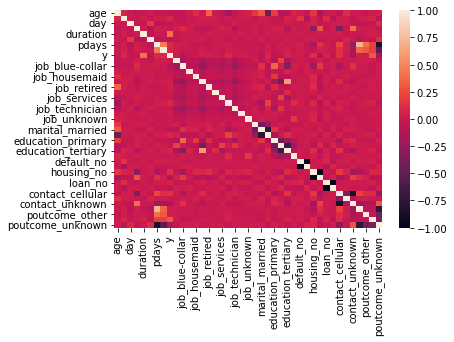

In [13]:
# plot a correlation diagram
sns.heatmap(newdf.corr())
plt.show()

### Feature Importance

In [14]:
# Create features and target
X = newdf.drop(['y'], axis = 1)
y = newdf['y']

In [15]:
# import train_test_split to split the dataset
#split dataset into 80 by 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# import randomforest classifier to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Create the RFE object and rank each pixel
clf_rf = RandomForestClassifier()      
rfe = RFE(estimator = clf_rf, n_features_to_select = 10, step = 1)
rfe = rfe.fit(X_train, y_train)

In [17]:
# display the top 10 most relevant features
print('Chosen best feature by rfe:', X_train.columns[rfe.support_])

Chosen best feature by rfe: Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'housing_yes', 'poutcome_success'],
      dtype='object')


### Algorithm Training and Experimentation

In [27]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [28]:
# split the dataset 70 by 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [29]:
# check the distribution of our target value
y_train.value_counts()

0    24472
1     2968
Name: y, dtype: int64

In [30]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('lr', LogisticRegression())] # ('scaler', StandardScaler()),
# Create the pipeline: pipeline
pipeline_lr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [31]:
# Print the parameters of the model
print(pipeline_lr.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('lr', LogisticRegression())], 'verbose': False, 'scaler': StandardScaler(), 'lr': LogisticRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'lr__C': 1.0, 'lr__class_weight': None, 'lr__dual': False, 'lr__fit_intercept': True, 'lr__intercept_scaling': 1, 'lr__l1_ratio': None, 'lr__max_iter': 100, 'lr__multi_class': 'auto', 'lr__n_jobs': None, 'lr__penalty': 'l2', 'lr__random_state': None, 'lr__solver': 'lbfgs', 'lr__tol': 0.0001, 'lr__verbose': 0, 'lr__warm_start': False}


In [32]:
# Compute metrics
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10522
           1       0.64      0.33      0.44      1239

    accuracy                           0.91     11761
   macro avg       0.78      0.66      0.69     11761
weighted avg       0.90      0.91      0.90     11761



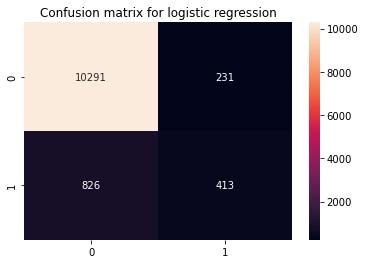

In [33]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title('Confusion matrix for logistic regression')
plt.show()

### Excercises

In [34]:
# Excercise 1: train the random forest classifer. DO NOT FORGET TO IMPORT RANDOM FOREST CLASSIFIER

#import random forest classifier

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestClassifier())] #
# Create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

In [35]:
# Excercise 2: diplay the classification report

# Compute metrics
print(classification_report(y_test, y_pred_rfr))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10522
           1       0.65      0.36      0.47      1239

    accuracy                           0.91     11761
   macro avg       0.79      0.67      0.71     11761
weighted avg       0.90      0.91      0.90     11761



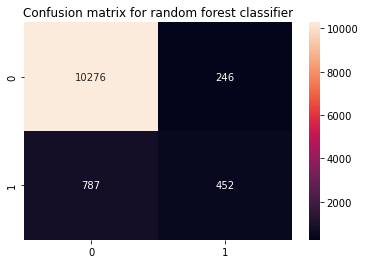

In [36]:
# Excercise 3: plot the confusion matrix

cm = confusion_matrix(y_test, y_pred_rfr)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title('Confusion matrix for random forest classifier')
plt.show()

### Tracking Experiment with Neptune

In [37]:
# import libraries
import neptune.new as neptune
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import neptune.new.integrations.sklearn as npt_utils

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('lr', LogisticRegression())] #
# Create the pipeline: pipeline
pipeline_lr = Pipeline(steps)

In [39]:
# split dataset, 70 by 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# save dataset to a local folder named cleaned

X_train.to_csv("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/refined/X_train.csv")
y_train.to_csv("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/refined/y_train.csv")
X_test.to_csv("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/refined/X_test.csv")
y_test.to_csv("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/refined/y_train.csv")

# Move the all the content of the clean folder to neptune
run["refined_dataset"].track_files("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/refined/")

In [43]:
# train algorithm with training data and log experiment on neptune
pipeline_lr.fit(X_train, y_train)
run["classifier"] = npt_utils.create_classifier_summary(pipeline_lr, X_train, X_test, y_train, y_test)

In [ ]:
# stop the experiment
run.stop()

### Excercises

In [46]:
# EXCERCISE 4: import library and parse it in the piipeline 
import neptune.new as neptune
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import neptune.new.integrations.sklearn as npt_utils

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestClassifier())] #
# Create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)

In [47]:
# EXCERCISE 5: Get credential from neptune and enter it here

run = neptune.init(
    project="oyebola/Week3Assignment",
    api_token="JhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJmMTJiMTBhMS1hN2QxLTRkYzMtYTQ4Yi01MDlmNjJjY2I1YjYifQ==",
)  # your credentials


https://app.neptune.ai/oyebola/Week3Assignment/e/WEEK-1
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [48]:
# Excercise 6: split the dataset with a different test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# save dataset to a local folder named refined

X_train.to_csv("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/refined/X_train.csv")
y_train.to_csv("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/refined/y_train.csv")
X_test.to_csv("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/refined/X_test.csv")
y_test.to_csv("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/refined/y_train.csv")

# Move the all the content of the clean folder to neptune
run["refined_dataset"].track_files("~/Desktop/End-to-End-ML-Q1-Cohort/End-to-End-ML-Q1-Cohort/notebooks/refined/")

In [49]:
# EXCERCISE 7: Use the classifier pipeline you create above
pipeline_rfr.fit(X_train, y_train)
run["classifier"] = npt_utils.create_classifier_summary(pipeline_rfr, X_train, X_test, y_train, y_test)

You are attempting to create an in-memory file that is 38.7MB large. Neptune supports logging in-memory file objects smaller than 32MB. Resize or increase compression of this object


In [50]:
# stop the experiment
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.


All 1 operations synced, thanks for waiting!
